In [1]:
import matplotlib.pyplot as plt
import Analyzer

In [ ]:
# 밴드폭은 상단 볼린저 밴드와 하단 볼린저 밴드 사이의 폭을 의미
# 밴드폭은 스퀴즈를 확인하는데 유용한 지표다.
# 스퀴즈란 변동성이 극히 낮은 수준까지 떨어져 곧이어 변동성 증가가 
# 발생할 것으로 예상되는 상황을 말한다.

# 밴드폭의 따 다른 중요한 역할은 강력한 추세의 시작과 마지막을 
# 포착하는 것이다. 강력한 추세는 스퀴즈로부터 시작되는데
# 변동성이 커지면서 밴드폭 수치가 급격히 높아진다.
# 이후 밴드폭 수치의 변도이 없거나 줄어들면서 볼린저 밴드가 
# 추세 반대쪽으로 방향을 바꾸면 추세가 끝났다고 본다.

In [3]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('NAVER', '2021-01-02')
df['MA20'] = df['close'].rolling(window=20).mean()
df['stddev'] = df['close'].rolling(window=20).std()
df['upper'] = df['MA20'] + (df['stddev'] * 2)
df['lower'] = df['MA20'] - (df['stddev'] * 2)
df['bandwidth'] = (df['upper'] - df['lower']) / df['MA20'] * 100 # ①
df = df[19:]

end_date is initialized to '2022-02-02'


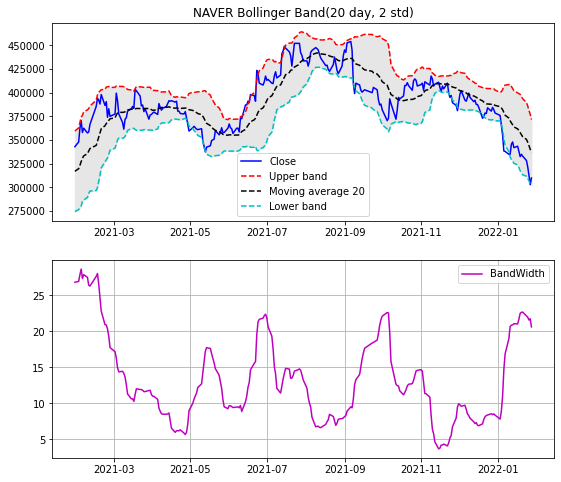

In [4]:
plt.figure(figsize=(9, 8))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['close'], color='#0000ff', label='Close')
plt.plot(df.index, df['upper'], 'r--', label ='Upper band')
plt.plot(df.index, df['MA20'], 'k--', label='Moving average 20')
plt.plot(df.index, df['lower'], 'c--', label ='Lower band')
plt.fill_between(df.index, df['upper'], df['lower'], color='0.9')
plt.title('NAVER Bollinger Band(20 day, 2 std)')
plt.legend(loc='best')
plt.subplot(2, 1, 2)
plt.plot(df.index, df['bandwidth'], color='m', label='BandWidth') # ②
plt.grid(True)
plt.legend(loc='best')
plt.show()